In [1]:
import pandas as pd

In [2]:
risk_df=pd.read_csv('../pcms_hackathon_data/train/risk.csv')

In [3]:
care_df=pd.read_csv('../pcms_hackathon_data/train/care.csv')

In [4]:
care_df.columns

Index(['care_id', 'patient_id', 'msrmnt_type', 'msrmnt_sub_type',
       'msrmnt_value', 'last_care_dt', 'next_care_dt', 'care_gap_ind'],
      dtype='object')

In [5]:
print(care_df.shape)
care_df.isnull().sum()

(425, 8)


care_id              0
patient_id           0
msrmnt_type          0
msrmnt_sub_type      0
msrmnt_value         0
last_care_dt        52
next_care_dt       274
care_gap_ind         0
dtype: int64

In [6]:
len(care_df.patient_id.unique())

320

In [7]:
care_df['msrmnt_type'].value_counts()

msrmnt_type
SCREENING               368
LAB TEST                 48
MEDICATION ADHERENCE      9
Name: count, dtype: int64

In [8]:
care_df['msrmnt_sub_type'].value_counts()

msrmnt_sub_type
COLORECTAL CANCER           267
BREAST CANCER               101
HbA1c                        39
SYSTOLIC BLOOD PRESSURE       7
HYPERTENSION                  4
CHOLESTEROL                   3
DIABETES                      2
DIASTOLIC BLOOD PRESSURE      2
Name: count, dtype: int64

In [9]:
care_df.head(3)

,care_id,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,last_care_dt,next_care_dt,care_gap_ind
0,474,186,SCREENING,COLORECTAL CANCER,0.0,2023-05-26,NaN,t
1,475,197,LAB TEST,HbA1c,6.5,2023-10-07,NaN,t
2,477,449,SCREENING,COLORECTAL CANCER,0.0,NaN,2025-12-31,t


In [10]:
care_df.shape

(425, 8)

In [11]:
care_df[care_df.patient_id==52259]

,care_id,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,last_care_dt,next_care_dt,care_gap_ind
268,804,52259,SCREENING,BREAST CANCER,0.0,2024-11-18,2026-11-18,t
269,805,52259,SCREENING,COLORECTAL CANCER,0.0,NaN,2025-03-31,t
270,806,52259,MEDICATION ADHERENCE,CHOLESTEROL,0.0,2024-09-12,2024-12-11,t


In [12]:
care_df.patient_id.value_counts()

patient_id
13197    3
52259    3
55238    3
60052    3
75254    3
        ..
6554     1
6611     1
14580    1
14909    1
80093    1
Name: count, Length: 320, dtype: int64

In [13]:
print(care_df.shape)
care_df.isnull().sum()

(425, 8)


care_id              0
patient_id           0
msrmnt_type          0
msrmnt_sub_type      0
msrmnt_value         0
last_care_dt        52
next_care_dt       274
care_gap_ind         0
dtype: int64

In [14]:
# Total number of care events per patient
care_df.groupby('patient_id').size()

patient_id
186      1
197      1
449      1
1536     1
1552     1
        ..
80876    1
81702    2
81798    2
81827    1
81948    1
Length: 320, dtype: int64

In [15]:
# Number of missed/delayed care events
(care_df[care_df['care_gap_ind']=='t'].groupby('patient_id').size())

patient_id
186      1
197      1
449      1
1536     1
1552     1
        ..
80876    1
81702    2
81798    2
81827    1
81948    1
Length: 320, dtype: int64

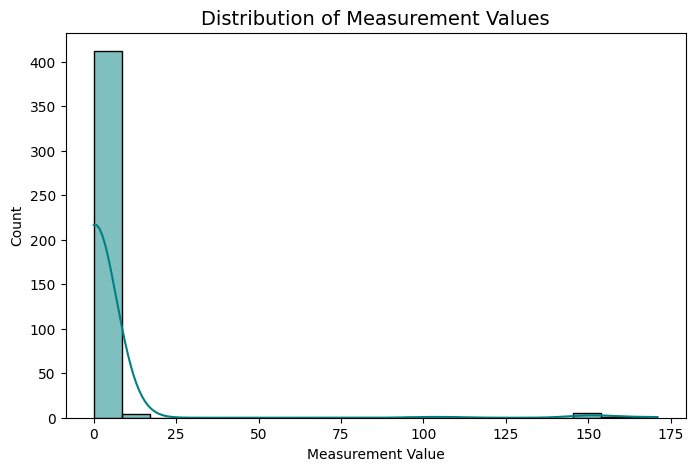

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(care_df['msrmnt_value'], bins=20, kde=True, color='teal')
plt.title('Distribution of Measurement Values', fontsize=14)
plt.xlabel('Measurement Value')
plt.ylabel('Count')
plt.show()


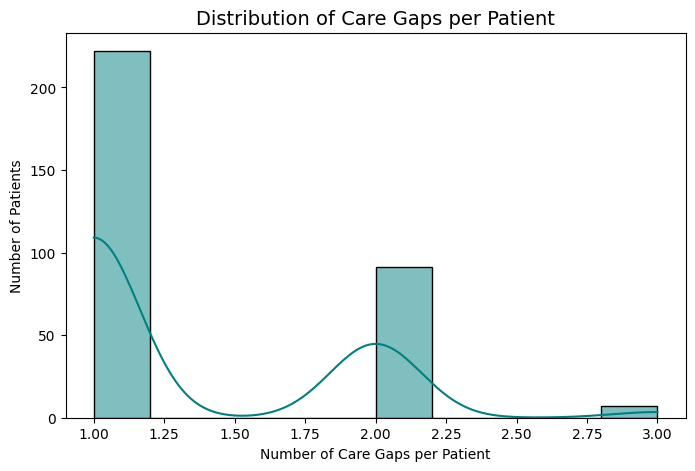

In [17]:
care_gap_counts = care_df[care_df['care_gap_ind']=='t'].groupby('patient_id').size().reset_index(name='care_gap_count')

plt.figure(figsize=(8,5))
sns.histplot(care_gap_counts['care_gap_count'], bins=10, kde=True, color='teal')
plt.title('Distribution of Care Gaps per Patient', fontsize=14)
plt.xlabel('Number of Care Gaps per Patient')
plt.ylabel('Number of Patients')
plt.show()


C:\Users\palla\AppData\Local\Temp\ipykernel_15224\3659006077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='msrmnt_type', data=care_df, palette='coolwarm', order=care_df['msrmnt_type'].value_counts().index)


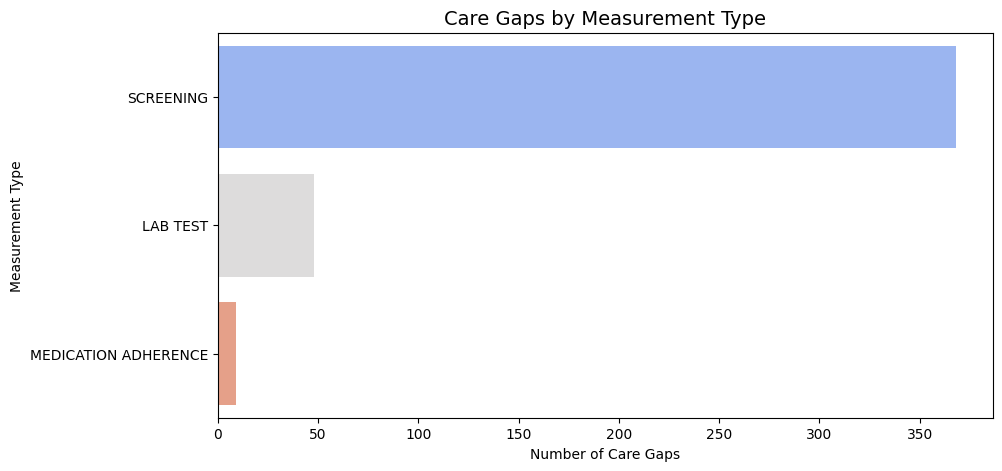

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(y='msrmnt_type', data=care_df, palette='coolwarm', order=care_df['msrmnt_type'].value_counts().index)
plt.title('Care Gaps by Measurement Type', fontsize=14)
plt.xlabel('Number of Care Gaps')
plt.ylabel('Measurement Type')
plt.show()


In [19]:
care_df['msrmnt_value'].describe()


count    425.000000
mean       3.706824
std       20.973075
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      171.000000
Name: msrmnt_value, dtype: float64

In [20]:
care_df.groupby('patient_id')['msrmnt_type'].nunique()

patient_id
186      1
197      1
449      1
1536     1
1552     1
        ..
80876    1
81702    1
81798    1
81827    1
81948    1
Name: msrmnt_type, Length: 320, dtype: int64

In [21]:
care_df.groupby('patient_id')['msrmnt_value'].mean()

patient_id
186      0.0
197      6.5
449      0.0
1536     0.0
1552     0.0
        ... 
80876    0.0
81702    0.0
81798    0.0
81827    0.0
81948    7.6
Name: msrmnt_value, Length: 320, dtype: float64

In [22]:
care_df['next_care_dt'].notna().astype(int)

0      0
1      0
2      1
3      1
4      0
      ..
420    0
421    0
422    1
423    0
424    0
Name: next_care_dt, Length: 425, dtype: int64

In [23]:
len(care_df['care_gap_ind']=='t')

425

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional aesthetic
sns.set(style="whitegrid", palette="Set2")


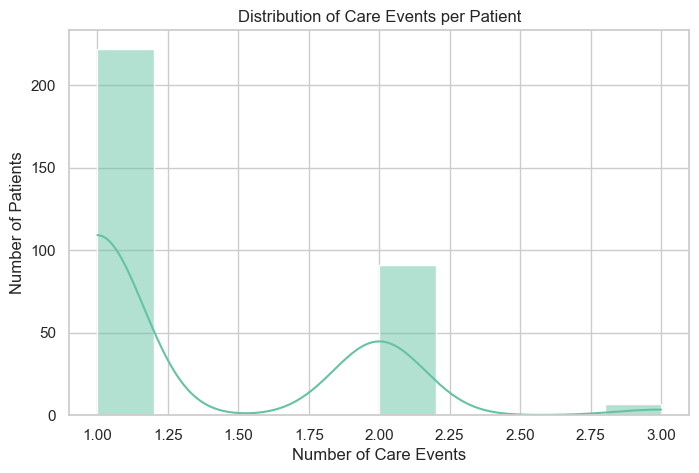

In [25]:
care_counts = care_df.groupby('patient_id').size().reset_index(name='care_count')

plt.figure(figsize=(8,5))
sns.histplot(care_counts['care_count'], bins=10, kde=True)
plt.title('Distribution of Care Events per Patient')
plt.xlabel('Number of Care Events')
plt.ylabel('Number of Patients')
plt.show()


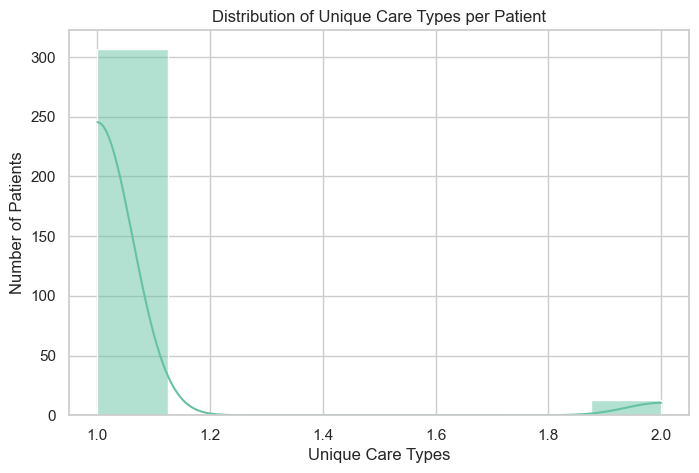

In [26]:
unique_care_types = care_df.groupby('patient_id')['msrmnt_type'].nunique().reset_index(name='unique_care_types')

plt.figure(figsize=(8,5))
sns.histplot(unique_care_types['unique_care_types'], bins=8, kde=True)
plt.title('Distribution of Unique Care Types per Patient')
plt.xlabel('Unique Care Types')
plt.ylabel('Number of Patients')
plt.show()


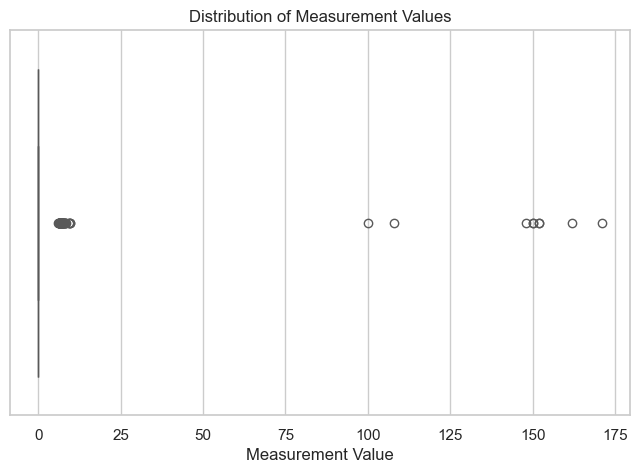

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x=care_df['msrmnt_value'])
plt.title('Distribution of Measurement Values')
plt.xlabel('Measurement Value')
plt.show()


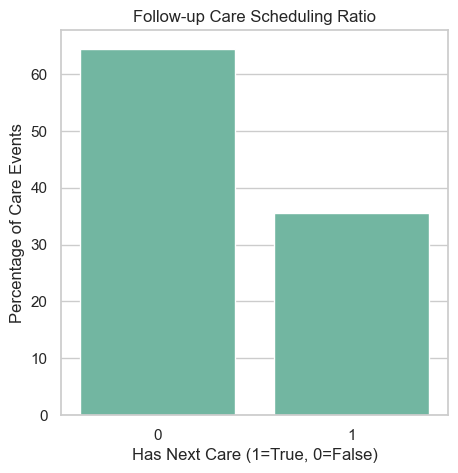

In [28]:
care_df['has_next_care'] = care_df['next_care_dt'].notna().astype(int)
next_care_ratio = care_df['has_next_care'].value_counts(normalize=True) * 100

plt.figure(figsize=(5,5))
sns.barplot(x=next_care_ratio.index, y=next_care_ratio.values)
plt.title('Follow-up Care Scheduling Ratio')
plt.xlabel('Has Next Care (1=True, 0=False)')
plt.ylabel('Percentage of Care Events')
plt.show()


In [29]:
care_df.head(3)

,care_id,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,last_care_dt,next_care_dt,care_gap_ind,has_next_care
0,474,186,SCREENING,COLORECTAL CANCER,0.0,2023-05-26,NaN,t,0
1,475,197,LAB TEST,HbA1c,6.5,2023-10-07,NaN,t,0
2,477,449,SCREENING,COLORECTAL CANCER,0.0,NaN,2025-12-31,t,1


In [30]:
care_df[care_df.patient_id==52259]

,care_id,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,last_care_dt,next_care_dt,care_gap_ind,has_next_care
268,804,52259,SCREENING,BREAST CANCER,0.0,2024-11-18,2026-11-18,t,1
269,805,52259,SCREENING,COLORECTAL CANCER,0.0,NaN,2025-03-31,t,1
270,806,52259,MEDICATION ADHERENCE,CHOLESTEROL,0.0,2024-09-12,2024-12-11,t,1


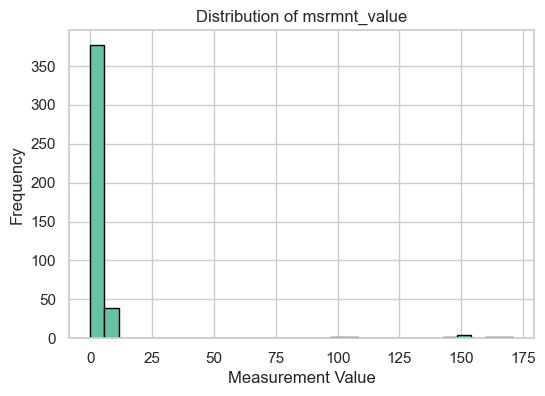

count    425.000000
mean       3.706824
std       20.973075
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      171.000000
Name: msrmnt_value, dtype: float64


In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(care_df['msrmnt_value'], bins=30, edgecolor='black')
plt.title('Distribution of msrmnt_value')
plt.xlabel('Measurement Value')
plt.ylabel('Frequency')
plt.show()

print(care_df['msrmnt_value'].describe())


In [39]:
care_df['last_care_dt'] = pd.to_datetime(care_df['last_care_dt'], errors='coerce')
care_df['next_care_dt'] = pd.to_datetime(care_df['next_care_dt'], errors='coerce')

type_dummies = pd.get_dummies(care_df['msrmnt_type'], prefix='type')
subtype_dummies = pd.get_dummies(care_df['msrmnt_sub_type'], prefix='subtype')

care_binary = pd.concat([care_df[['patient_id']], type_dummies, subtype_dummies], axis=1)
care_binary = care_binary.groupby('patient_id').max().reset_index()

type_cols = [c for c in care_binary.columns if c.startswith('type_')]
subtype_cols = [c for c in care_binary.columns if c.startswith('subtype_')]

care_binary['count_msrmnt_type'] = care_binary[type_cols].sum(axis=1)
care_binary['count_msrmnt_sub_type'] = care_binary[subtype_cols].sum(axis=1)

care_agg = (
    care_df
    .groupby('patient_id')
    .agg({
        'care_id': 'count',                          
        'msrmnt_value': 'median',                      
        'last_care_dt': 'min',                       
        'next_care_dt': 'max',                       
        'care_gap_ind': lambda x: (x == 't').sum(),  
        'has_next_care': 'max'                       
    })
    .reset_index()
    .rename(columns={
        'care_id': 'num_care_events',
        'msrmnt_value': 'avg_msrmnt_value',
        'care_gap_ind': 'num_care_gaps'
    })
)


care_agg['has_last_care'] = care_agg['last_care_dt'].notna().astype(int)

care_agg['has_next_care'] = care_agg['has_next_care'].astype(int)

care_final = care_agg.merge(care_binary, on='patient_id', how='left')

care_final.fillna({
    'num_care_events': 0,
    'avg_msrmnt_value': 0,
    'num_care_gaps': 0,
    'has_next_care': 0,
    'count_msrmnt_type': 0,
    'count_msrmnt_sub_type': 0
}, inplace=True)

care_final['care_duration_days'] = (
    care_final['next_care_dt'] - care_final['last_care_dt']
).dt.days.replace([np.inf, np.nan], 0)

print("Care table aggregated successfully!")
print("Shape:", care_final.shape)
# print(care_final.head())


Care table aggregated successfully!
Shape: (320, 22)


In [40]:
care_final.head(3)

,patient_id,num_care_events,avg_msrmnt_value,last_care_dt,next_care_dt,num_care_gaps,has_next_care,has_last_care,type_LAB TEST,type_MEDICATION ADHERENCE,...,subtype_CHOLESTEROL,subtype_COLORECTAL CANCER,subtype_DIABETES,subtype_DIASTOLIC BLOOD PRESSURE,subtype_HYPERTENSION,subtype_HbA1c,subtype_SYSTOLIC BLOOD PRESSURE,count_msrmnt_type,count_msrmnt_sub_type,care_duration_days
0,186,1,0.0,2023-05-26,NaT,1,0,1,False,False,...,False,True,False,False,False,False,False,1,1,0.0
1,197,1,6.5,2023-10-07,NaT,1,0,1,True,False,...,False,False,False,False,False,True,False,1,1,0.0
2,449,1,0.0,NaT,2025-12-31,1,1,0,False,False,...,False,True,False,False,False,False,False,1,1,0.0


In [41]:
len(care_df.patient_id.unique())

320

In [42]:
care_final.isnull().sum()

patient_id                            0
num_care_events                       0
avg_msrmnt_value                      0
last_care_dt                         31
next_care_dt                        189
num_care_gaps                         0
has_next_care                         0
has_last_care                         0
type_LAB TEST                         0
type_MEDICATION ADHERENCE             0
type_SCREENING                        0
subtype_BREAST CANCER                 0
subtype_CHOLESTEROL                   0
subtype_COLORECTAL CANCER             0
subtype_DIABETES                      0
subtype_DIASTOLIC BLOOD PRESSURE      0
subtype_HYPERTENSION                  0
subtype_HbA1c                         0
subtype_SYSTOLIC BLOOD PRESSURE       0
count_msrmnt_type                     0
count_msrmnt_sub_type                 0
care_duration_days                    0
dtype: int64

In [43]:
care_final.head(3)

,patient_id,num_care_events,avg_msrmnt_value,last_care_dt,next_care_dt,num_care_gaps,has_next_care,has_last_care,type_LAB TEST,type_MEDICATION ADHERENCE,...,subtype_CHOLESTEROL,subtype_COLORECTAL CANCER,subtype_DIABETES,subtype_DIASTOLIC BLOOD PRESSURE,subtype_HYPERTENSION,subtype_HbA1c,subtype_SYSTOLIC BLOOD PRESSURE,count_msrmnt_type,count_msrmnt_sub_type,care_duration_days
0,186,1,0.0,2023-05-26,NaT,1,0,1,False,False,...,False,True,False,False,False,False,False,1,1,0.0
1,197,1,6.5,2023-10-07,NaT,1,0,1,True,False,...,False,False,False,False,False,True,False,1,1,0.0
2,449,1,0.0,NaT,2025-12-31,1,1,0,False,False,...,False,True,False,False,False,False,False,1,1,0.0
